# build a Mastertable

In [62]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import pytesseract

## merge images and text file 

In [7]:
import os
from PIL import Image
import pandas as pd

image_folder_path = "SROIE2019/test/img"
text_folder_path = "SROIE2019/test/entities"


data = {'Image Name': [], 'Text File Name': []}

# Iterate through the files in the image folder
for image_filename in os.listdir(image_folder_path):
    # Check if the file is an image
    if image_filename.lower().endswith('.jpg'):
     
        text_filename = os.path.splitext(image_filename)[0] + '.txt'
        text_file_path = os.path.join(text_folder_path, text_filename)
            
          
    data['Image Name'].append(image_filename)
    data['Text File Name'].append(text_filename)



df_train = pd.DataFrame(data)


print(df_train)


           Image Name    Text File Name
0    X51005663300.jpg  X51005663300.txt
1    X51006619842.jpg  X51006619842.txt
2    X51006350737.jpg  X51006350737.txt
3    X51005605287.jpg  X51005605287.txt
4    X51007339127.jpg  X51007339127.txt
..                ...               ...
342  X51005757282.jpg  X51005757282.txt
343  X51007103597.jpg  X51007103597.txt
344  X51006556851.jpg  X51006556851.txt
345  X51005444044.jpg  X51005444044.txt
346  X51006647933.jpg  X51006647933.txt

[347 rows x 2 columns]


In [14]:
df_train.dtypes


Image Name        object
Text File Name    object
dtype: object

## Extract features (company, date, address, total) from Json file and merge them in  the dataframe

In [20]:
import os
import json

origin_path_entities = "SROIE2019/test/entities"  

for i, file_path in enumerate(df_train["Text File Name"]):
    full_file_path = os.path.join(origin_path_entities, file_path)  
    
    with open(full_file_path, 'r') as json_file:
        json_content = json.load(json_file)

    df_train.at[i, 'company'] = json_content["company"]
    df_train.at[i, 'date'] = json_content["date"]
    df_train.at[i, 'address'] = json_content["address"]
    df_train.at[i, 'total'] = json_content["total"]

df_train.head(7)


,Image Name,Text File Name,company,date,address,total
0,X51005663300.jpg,X51005663300.txt,LIM SENG THO HARDWARE TRADING,02/02/2018,"NO 7, SIMPANG OFF BATU VILLAGE, JALAN IPOH BAT...",7.00
1,X51006619842.jpg,X51006619842.txt,YIN MA (M) SDN.BHD.,03 JUN 2016,"NO.2, JALAN UDANG SIAR 2, TAMAN SRI SEGAMBUT, ...",32.70
2,X51006350737.jpg,X51006350737.txt,C W KHOO HARDWARE SDN BHD,31/03/2018,"NO.50 , JALAN PBS 14/11 , KAWASAN PERINDUSTRIA...",14.65
3,X51005605287.jpg,X51005605287.txt,AEON CO. (M) BHD,14/03/2018,"3RD FLR, AEON TAMAN MALURI SC JLN JEJAKA, TAMA...",12.25
4,X51007339127.jpg,X51007339127.txt,SANYU STATIONERY SHOP,24/10/2017,"NO. 31G&33G, JALAN SETIA INDAH X ,U13/X 40170 ...",3.00
5,X51005719889.jpg,X51005719889.txt,HENG KEE DELIGHTS BAK KUT TEH.,04/01/2018,"NO31 , JALAN 3/62A , BANDAR MENJALARA KEPONG. ...",42.00
6,X51006555819.jpg,X51006555819.txt,GARDENIA BAKERIES (KL) SDN BHD,23/07/2017,"LOT 3, JALAN PELABUR 23/1, 40300 SHAH ALAM, SE...",26.58


In [19]:
df_train.dtypes

Image Name        object
Text File Name    object
company           object
date              object
address           object
total             object
dtype: object

## Image preprocessing to have a good OCR result

### read image 

In [42]:
origin_path_images = "SROIE2019/test/img" 
file_path = df_train["Image Name"][0]
image_file = os.path.join(origin_path_images,file_path)
img = cv2.imread(image_file)


### display images 

In [54]:
def display(im_path):
    dpi = 160
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)
  
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

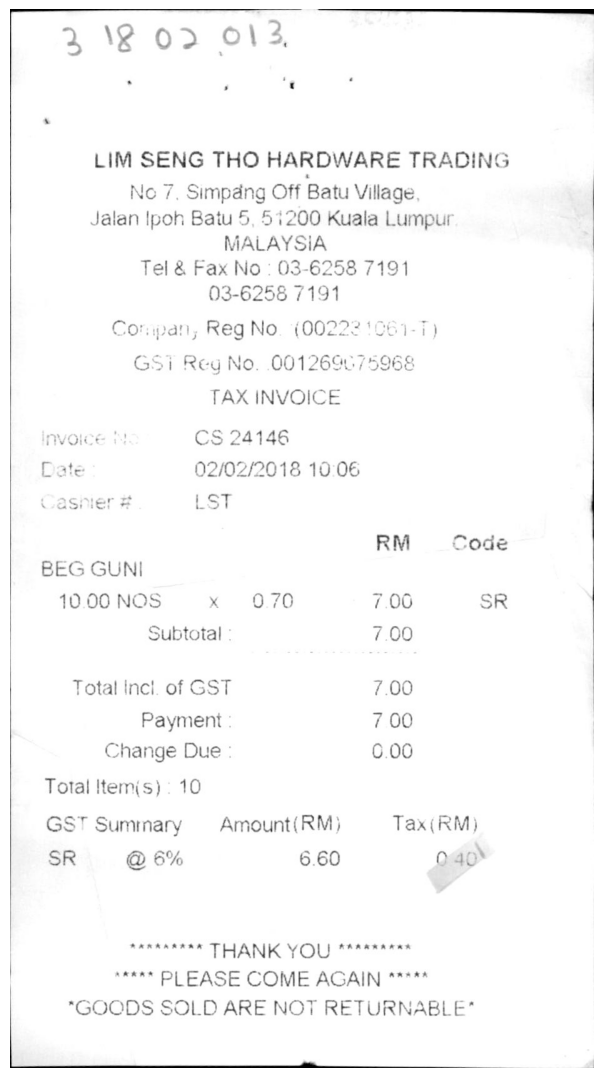

In [55]:
display(image_file)

### Binarization

In [56]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [57]:
gray_image = grayscale(img)
cv2.imwrite("temp/gray.jpg", gray_image)

True

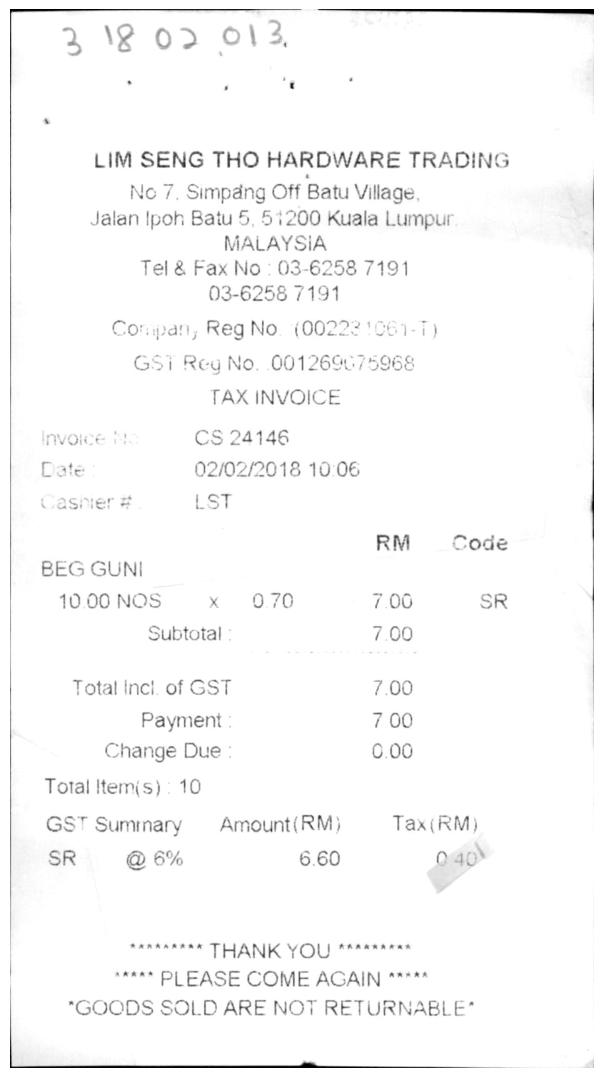

In [58]:
display("temp/gray.jpg")

## OCR

In [60]:
image_preprocessed = "temp/gray.jpg"
img = Image.open(image_preprocessed)

In [63]:
ocr_result = pytesseract.image_to_string(img)

In [64]:
print (ocr_result)

4 \2 02 013,

LIM SENG THO HARDWARE TRADING
No 7, Simpdng Off Batu Village,
Jalan Ipoh Batu 5, 51200 Kuala Lumpur
MALAYSIA
Tel & Fax No : 03-6258 7191
03-6258 7191
Cornwpan,; Reg No. (00222 1061-7)
GSi Reg No. 001269075968

TAX INVOICE
nvoice M CS 24146
Date 02/02/2018 10:06
Casnier # LST
RM Code
BEG GUNI
10.00 NOS x 070 7.06 SR
Subtotal : 7.00
Total incl. of GST 7.00
Payment : 7 00
Change Due : 0.00
Total Item(s): 10
GST Suminary = Amount(RM) Tax(RM)
SR @ 6% 6.60 o@0*

(TANK VOL aes
““*** PLEASE COME AGAIN ***"*
"GOODS SOLD ARE NOT RETURNABLE”

Mi


